In [ ]:
%config Completer.use_jedi = False

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  """Entry point for launching an IPython kernel.


# Business Understanding

 - Attemp to predict customer whether the customer will leave the company (churned) or not using classification techniques with the focus on prediction task. In this report, the main goal is breakdown analysis of classification task of telco company’s customer churn problem.

- avoid severe false positive/negative on the result
- with prediction power task, attemp model with high score metrics
- consider AI ethics principal while feature selection



# Analytics Approach

- Exploratory data analysis
- descriptive statistic to get know of the data
- main objective: predictive statistics using supervised model to classify churned customer

# Data Requirements

- age information

# Data Collection

- company's data warehouse

# Data Understanding

- age, under 30, and senior variables are referring to the same information.
to avoid multicollinearity we will use only Age


# Data Preparation

# Modeling

# Evaluation

# Deployment

# Feedback

# import required library

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [ ]:
!pip install outlier_utils

In [ ]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import ADASYN,SMOTE
from imblearn.under_sampling import EditedNearestNeighbours,RandomUnderSampler
from sklearn.kernel_approximation import Nystroem
from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline,make_pipeline
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
#model
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#statistical 
from scipy.stats import chi2_contingency,f_oneway,kruskal,pearsonr,normaltest
from outliers import smirnov_grubbs

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve

# inspecting raw data

In [ ]:
df = pd.read_pickle('/content/fulldata.pkl')
df.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,ID,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,21,68701,Q3,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237,54,55668,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715,56,47534,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639,100,27778,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188,114,26265,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,1,67,2793,Price,Extra data charges


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Gender                             7043 non-null   object 
 3   Age                                7043 non-null   int64  
 4   Under 30                           7043 non-null   object 
 5   Senior Citizen                     7043 non-null   object 
 6   Married                            7043 non-null   object 
 7   Dependents                         7043 non-null   object 
 8   Number of Dependents               7043 non-null   int64  
 9   Country                            7043 non-null   object 
 10  State                              7043 non-null   object 
 11  City                               7043 non-null   objec

In [ ]:
df['encoded_label'] = df['Churn Label'].apply(lambda x: 1 if x=='Yes' else 0 )
df['encoded_label'].head()

0    1
1    1
2    1
3    1
4    1
Name: encoded_label, dtype: int64

In [ ]:
df[df.duplicated()]
#no duplicate

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,ID,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,encoded_label


# inspect missing value

In [ ]:
def missing_percentage():
    na_val = df.isnull().sum() * 100 / len(df)
    na_val = na_val[na_val.values > 0]
    na_val.sort_values(ascending=False)
    return na_val

In [ ]:
missing_percentage()

Churn Category    73.463013
Churn Reason      73.463013
dtype: float64

# Feature Selection

## Used Feature
- Under 30
- Married
- Number of Dependents
- Number of Referrals
- Tenure in Months
- Offer
- Multiple Lines
- Internet Service
- Internet Type
- Online Security
- Online Backup
- Device Protection Plan
- Premium Tech Support
- Streaming TV
- Streaming Movies
- Streaming Music
- Unlimited Data
- Contract
- Paperless Billing
- Payment Method
- Total Charges
- Total Revenue
- Satisfaction Score

# correlation test for feature selection

correlation interpretation guide based on:  
Statistic without math for psychology by Dancey and Reidy

In [ ]:
#point biserial correlation, Pearson corr
df['Age'].corr(df['encoded_label'])

0.11575973716171706

In [ ]:
#chi square contingency
obs = pd.crosstab(df['Under 30'],df['Churn Label'],margins=True)
display(obs)
chi2_contingency(obs)
#result is reject H0 variable is independent, means tbere is a correlation (dependent)


Churn Label,No,Yes,All
Under 30,,,
No,4077,1565,5642
Yes,1097,304,1401
All,5174,1869,7043


(20.999556202841383,
 0.00031673333210227925,
 4,
 array([[4144.78318898, 1497.21681102, 5642.        ],
        [1029.21681102,  371.78318898, 1401.        ],
        [5174.        , 1869.        , 7043.        ]]))

In [ ]:
#chi square contingency
married_obs = pd.crosstab(df['Married'],df['Churn Label'],margins=True)
display(married_obs)
chi2_contingency(married_obs)

#result is reject H0 variable is independent, means tbere is a correlation (dependent)

Churn Label,No,Yes,All
Married,,,
No,2441,1200,3641
Yes,2733,669,3402
All,5174,1869,7043


(159.41452843242658,
 1.952035040461347e-33,
 4,
 array([[2674.78830044,  966.21169956, 3641.        ],
        [2499.21169956,  902.78830044, 3402.        ],
        [5174.        , 1869.        , 7043.        ]]))

In [ ]:
#point biserial correlation, Pearson corr
df['Number of Dependents'].corr(df['encoded_label'])

-0.21878018695662757

In [ ]:
#point biserial correlation, Pearson corr
df['Tenure in Months'].corr(df['encoded_label'])

-0.3528611958713403

In [ ]:
#point biserial correlation, Pearson corr
df['Number of Referrals'].corr(df['encoded_label'])

-0.2865404715037923

In [ ]:
#chi square contingency
ofr_obs = pd.crosstab(df['Offer'],df['Churn Label'],margins=True)
display(ofr_obs)
chi2_contingency(ofr_obs)
#result is reject H0 variable is independent, means tbere is a correlation (dependent)

Churn Label,No,Yes,All
Offer,,,
None,2826,1051,3877
Offer A,485,35,520
Offer B,723,101,824
Offer C,320,95,415
Offer D,441,161,602
Offer E,379,426,805
All,5174,1869,7043


(481.7254889632278,
 1.711503009952356e-95,
 12,
 array([[2848.16101093, 1028.83898907, 3877.        ],
        [ 382.00766719,  137.99233281,  520.        ],
        [ 605.33522647,  218.66477353,  824.        ],
        [ 304.87150362,  110.12849638,  415.        ],
        [ 442.24733778,  159.75266222,  602.        ],
        [ 591.37725401,  213.62274599,  805.        ],
        [5174.        , 1869.        , 7043.        ]]))

In [ ]:
#chi square contingency
pho_obs = pd.crosstab(df['Phone Service'],df['Churn Label'],margins=True)
display(pho_obs)
chi2_contingency(pho_obs)
#result is keep H0 variable is independent, means tbere is a no correlation/difference

Churn Label,No,Yes,All
Phone Service,,,
No,512,170,682
Yes,4662,1699,6361
All,5174,1869,7043


(1.0044084772333213,
 0.9091267853074723,
 4,
 array([[ 501.01774812,  180.98225188,  682.        ],
        [4672.98225188, 1688.01774812, 6361.        ],
        [5174.        , 1869.        , 7043.        ]]))

In [ ]:
#point biserial correlation, Pearson corr
df['Avg Monthly Long Distance Charges'].corr(df['encoded_label'])

0.008119528923840769

In [ ]:
#chi square contingency
mli_obs = pd.crosstab(df['Multiple Lines'],df['Churn Label'],margins=True)
display(mli_obs)
chi2_contingency(mli_obs)
#result is reject H0 variable is independent, means tbere is a correlation (dependent)


Churn Label,No,Yes,All
Multiple Lines,,,
No,3053,1019,4072
Yes,2121,850,2971
All,5174,1869,7043


(11.326416290152446,
 0.023130410091547645,
 4,
 array([[2991.41388613, 1080.58611387, 4072.        ],
        [2182.58611387,  788.41388613, 2971.        ],
        [5174.        , 1869.        , 7043.        ]]))

In [ ]:
#chi square contingency
ise_obs = pd.crosstab(df['Internet Service'],df['Churn Label'],margins=True)
display(ise_obs)
chi2_contingency(ise_obs)
#result is reject H0 variable is independent, means tbere is a correlation (dependent)

Churn Label,No,Yes,All
Internet Service,,,
No,1413,113,1526
Yes,3761,1756,5517
All,5174,1869,7043


(365.7715640851134,
 6.890681737550473e-78,
 4,
 array([[1121.04557717,  404.95442283, 1526.        ],
        [4052.95442283, 1464.04557717, 5517.        ],
        [5174.        , 1869.        , 7043.        ]]))

In [ ]:
#chi square contingency
ity_obs = pd.crosstab(df['Internet Type'],df['Churn Label'],margins=True)
display(ity_obs)
chi2_contingency(ity_obs)
#result is reject H0 variable is independent, means tbere is a correlation (dependent)

Churn Label,No,Yes,All
Internet Type,,,
Cable,617,213,830
DSL,1345,307,1652
Fiber Optic,1799,1236,3035
None,1413,113,1526
All,5174,1869,7043


(653.8320544960782,
 6.1847499036772994e-136,
 8,
 array([[ 609.74300724,  220.25699276,  830.        ],
        [1213.60897345,  438.39102655, 1652.        ],
        [2229.60244214,  805.39755786, 3035.        ],
        [1121.04557717,  404.95442283, 1526.        ],
        [5174.        , 1869.        , 7043.        ]]))

In [ ]:
#point biserial correlation, Pearson corr
df['Avg Monthly GB Download'].corr(df['encoded_label'])

0.048867552338053295

In [ ]:
#chi square contingency
ons_obs = pd.crosstab(df['Online Security'],df['Churn Label'],margins=True)
display(ons_obs)
chi2_contingency(ons_obs)
#result is reject H0 variable is independent, means tbere is a correlation (dependent)

Churn Label,No,Yes,All
Online Security,,,
No,3450,1574,5024
Yes,1724,295,2019
All,5174,1869,7043


(206.4897944324984,
 1.5113521208234787e-43,
 4,
 array([[3690.78176913, 1333.21823087, 5024.        ],
        [1483.21823087,  535.78176913, 2019.        ],
        [5174.        , 1869.        , 7043.        ]]))

In [ ]:
#chi square contingency
onb_obs = pd.crosstab(df['Online Backup'],df['Churn Label'],margins=True)
display(onb_obs)
chi2_contingency(onb_obs)
#result is reject H0 variable is independent, means tbere is a correlation (dependent)

Churn Label,No,Yes,All
Online Backup,,,
No,3268,1346,4614
Yes,1906,523,2429
All,5174,1869,7043


(47.651976377170385,
 1.1153504535976225e-09,
 4,
 array([[3389.58341616, 1224.41658384, 4614.        ],
        [1784.41658384,  644.58341616, 2429.        ],
        [5174.        , 1869.        , 7043.        ]]))

In [ ]:
#chi square contingency
dpp_obs = pd.crosstab(df['Device Protection Plan'],df['Churn Label'],margins=True)
display(dpp_obs)
chi2_contingency(dpp_obs)
#result is reject H0 variable is independent, means tbere is a correlation (dependent)

Churn Label,No,Yes,All
Device Protection Plan,,,
No,3297,1324,4621
Yes,1877,545,2422
All,5174,1869,7043


(30.828041948997473,
 3.3188737402615326e-06,
 4,
 array([[3394.72582706, 1226.27417294, 4621.        ],
        [1779.27417294,  642.72582706, 2422.        ],
        [5174.        , 1869.        , 7043.        ]]))

In [ ]:
#chi square contingency
pts_obs = pd.crosstab(df['Premium Tech Support'],df['Churn Label'],margins=True)
display(pts_obs)
chi2_contingency(pts_obs)
#result is reject H0 variable is independent, means tbere is a correlation (dependent)

Churn Label,No,Yes,All
Premium Tech Support,,,
No,3440,1559,4999
Yes,1734,310,2044
All,5174,1869,7043


(190.9877074334982,
 3.251216770750026e-40,
 4,
 array([[3672.4160159, 1326.5839841, 4999.       ],
        [1501.5839841,  542.4160159, 2044.       ],
        [5174.       , 1869.       , 7043.       ]]))

In [ ]:
#chi square contingency
stv_obs = pd.crosstab(df['Streaming TV'],df['Churn Label'],margins=True)
display(stv_obs)
chi2_contingency(stv_obs)
#result is reject H0 variable is independent, means tbere is a correlation (dependent)

Churn Label,No,Yes,All
Streaming TV,,,
No,3281,1055,4336
Yes,1893,814,2707
All,5174,1869,7043


(28.15613831361442,
 1.1596260964887932e-05,
 4,
 array([[3185.35624024, 1150.64375976, 4336.        ],
        [1988.64375976,  718.35624024, 2707.        ],
        [5174.        , 1869.        , 7043.        ]]))

In [ ]:
#chi square contingency
stm_obs = pd.crosstab(df['Streaming Movies'],df['Churn Label'],margins=True)
display(stm_obs)
chi2_contingency(stm_obs)
#result is reject H0 variable is independent, means tbere is a correlation (dependent)

Churn Label,No,Yes,All
Streaming Movies,,,
No,3260,1051,4311
Yes,1914,818,2732
All,5174,1869,7043


(26.535871917964826,
 2.4670035709610893e-05,
 4,
 array([[3166.99048701, 1144.00951299, 4311.        ],
        [2007.00951299,  724.99048701, 2732.        ],
        [5174.        , 1869.        , 7043.        ]]))

In [ ]:
#chi square contingency
stu_obs = pd.crosstab(df['Streaming Music'],df['Churn Label'],margins=True)
display(stu_obs)
chi2_contingency(stu_obs)
#result is reject H0 variable is independent, means tbere is a correlation (dependent)
#weak results

Churn Label,No,Yes,All
Streaming Music,,,
No,3414,1141,4555
Yes,1760,728,2488
All,5174,1869,7043


(14.636671272464014,
 0.00551726261301943,
 4,
 array([[3346.24023853, 1208.75976147, 4555.        ],
        [1827.75976147,  660.24023853, 2488.        ],
        [5174.        , 1869.        , 7043.        ]]))

In [ ]:
#chi square contingency
uda_obs = pd.crosstab(df['Unlimited Data'],df['Churn Label'],margins=True)
display(uda_obs)
chi2_contingency(uda_obs)
#result is reject H0 variable is independent, means tbere is a correlation (dependent)

Churn Label,No,Yes,All
Unlimited Data,,,
No,1931,367,2298
Yes,3243,1502,4745
All,5174,1869,7043


(195.35290590193162,
 3.748599141190459e-41,
 4,
 array([[1688.18003692,  609.81996308, 2298.        ],
        [3485.81996308, 1259.18003692, 4745.        ],
        [5174.        , 1869.        , 7043.        ]]))

In [ ]:
#chi square contingency
ctr_obs = pd.crosstab(df['Contract'],df['Churn Label'],margins=True)
display(ctr_obs)
chi2_contingency(ctr_obs)
#result is reject H0 variable is independent, means tbere is a correlation (dependent)

Churn Label,No,Yes,All
Contract,,,
Month-to-Month,1955,1655,3610
One Year,1384,166,1550
Two Year,1835,48,1883
All,5174,1869,7043


(1445.2932428377585,
 3.77210578006437e-309,
 6,
 array([[2652.01476643,  957.98523357, 3610.        ],
        [1138.67670027,  411.32329973, 1550.        ],
        [1383.3085333 ,  499.6914667 , 1883.        ],
        [5174.        , 1869.        , 7043.        ]]))

In [ ]:
#chi square contingency
plb_obs = pd.crosstab(df['Paperless Billing'],df['Churn Label'],margins=True)
display(plb_obs)
chi2_contingency(plb_obs)
#result is reject H0 variable is independent, means tbere is a correlation (dependent)

Churn Label,No,Yes,All
Paperless Billing,,,
No,2403,469,2872
Yes,2771,1400,4171
All,5174,1869,7043


(259.1609742710177,
 6.914929538933956e-55,
 4,
 array([[2109.85773108,  762.14226892, 2872.        ],
        [3064.14226892, 1106.85773108, 4171.        ],
        [5174.        , 1869.        , 7043.        ]]))

In [ ]:
#chi square contingency
pmm_obs = pd.crosstab(df['Payment Method'],df['Churn Label'],margins=True)
display(pmm_obs)
chi2_contingency(pmm_obs)
#result is reject H0 variable is independent, means tbere is a correlation (dependent)

Churn Label,No,Yes,All
Payment Method,,,
Bank Withdrawal,2580,1329,3909
Credit Card,2351,398,2749
Mailed Check,243,142,385
All,5174,1869,7043


(337.83116120290356,
 6.314615211394561e-70,
 6,
 array([[2871.66917507, 1037.33082493, 3909.        ],
        [2019.49822519,  729.50177481, 2749.        ],
        [ 282.83259974,  102.16740026,  385.        ],
        [5174.        , 1869.        , 7043.        ]]))

In [ ]:
#point biserial correlation, Pearson corr
df['Monthly Charge'].corr(df['encoded_label'])
#multicollinearity with total charges

0.19335642223784683

In [ ]:
#point biserial correlation, Pearson corr
df['Total Charges'].corr(df['encoded_label'])

-0.19854608810394525

In [ ]:
#point biserial correlation, Pearson corr
df['Total Refunds'].corr(df['encoded_label'])

-0.03370933233112317

In [ ]:
#point biserial correlation, Pearson corr
df['Total Revenue'].corr(df['encoded_label'])

-0.22300280138238684

In [ ]:
#point biserial correlation, Pearson corr
df['Satisfaction Score'].corr(df['encoded_label'])

-0.7546490292381518

# Selected Data

In [ ]:
df = df[['Under 30','Married',
         'Number of Dependents','Number of Referrals',
         'Tenure in Months',
         'Offer','Multiple Lines',
         'Internet Service','Internet Type',
         'Online Security','Online Backup',
         'Device Protection Plan','Premium Tech Support',
         'Streaming TV','Streaming Movies',
         'Streaming Music','Unlimited Data',
         'Contract','Paperless Billing',
         'Payment Method','Total Charges',
         'Total Revenue','Satisfaction Score',
         'Churn Label']].copy()
df.head()

,Under 30,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Total Charges,Total Revenue,Satisfaction Score,Churn Label
0,No,No,0,0,1,None,No,Yes,DSL,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,59.65,3,Yes
1,No,Yes,1,1,8,Offer E,Yes,Yes,Fiber Optic,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,633.30,1024.10,3,Yes
2,No,No,3,0,18,Offer D,Yes,Yes,Fiber Optic,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,1752.55,1910.88,2,Yes
3,No,Yes,1,1,25,Offer C,No,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,2514.50,2995.07,2,Yes
4,No,Yes,1,1,37,Offer C,Yes,Yes,Fiber Optic,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,2868.15,3102.36,2,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Under 30                7043 non-null   object 
 1   Married                 7043 non-null   object 
 2   Number of Dependents    7043 non-null   int64  
 3   Number of Referrals     7043 non-null   int64  
 4   Tenure in Months        7043 non-null   int64  
 5   Offer                   7043 non-null   object 
 6   Multiple Lines          7043 non-null   object 
 7   Internet Service        7043 non-null   object 
 8   Internet Type           7043 non-null   object 
 9   Online Security         7043 non-null   object 
 10  Online Backup           7043 non-null   object 
 11  Device Protection Plan  7043 non-null   object 
 12  Premium Tech Support    7043 non-null   object 
 13  Streaming TV            7043 non-null   object 
 14  Streaming Movies        7043 non-null   

In [ ]:
round(df.describe(),2)

,Number of Dependents,Number of Referrals,Tenure in Months,Total Charges,Total Revenue,Satisfaction Score
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.47,1.95,32.39,2280.38,3034.38,3.24
std,0.96,3.00,24.54,2266.22,2865.20,1.20
min,0.00,0.00,1.00,18.80,21.36,1.00
25%,0.00,0.00,9.00,400.15,605.61,3.00
50%,0.00,0.00,29.00,1394.55,2108.64,3.00
75%,0.00,3.00,55.00,3786.60,4801.15,4.00
max,9.00,11.00,72.00,8684.80,11979.34,5.00


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Under 30,7043,2,No,5642
Married,7043,2,No,3641
Offer,7043,6,None,3877
Multiple Lines,7043,2,No,4072
Internet Service,7043,2,Yes,5517
Internet Type,7043,4,Fiber Optic,3035
Online Security,7043,2,No,5024
Online Backup,7043,2,No,4614
Device Protection Plan,7043,2,No,4621
Premium Tech Support,7043,2,No,4999


In [ ]:
numerical_features = ['Number of Dependents','Number of Referrals','Tenure in Months','Total Charges','Total Revenue']
ordinal_features = ['Satisfaction Score','Contract']
categorical_features = ['Under 30','Married','Offer','Multiple Lines','Internet Service','Internet Type',
                        'Online Security','Online Backup','Device Protection Plan','Premium Tech Support',
                        'Streaming TV','Streaming Movies','Streaming Music','Unlimited Data','Paperless Billing',
                        'Payment Method']

sat_score = [1,2,3,4,5]
contract = ['Month-to-Month','One Year','Two Year']

In [ ]:
df['Churn Label'].value_counts()

No     5174
Yes    1869
Name: Churn Label, dtype: int64

In [ ]:
round(df['Churn Label'].value_counts() * 100 / df['Churn Label'].value_counts().sum(),2)

No     73.46
Yes    26.54
Name: Churn Label, dtype: float64

the class is imbalance need further re balance technique

# outliers inspection

In [ ]:
from outliers import smirnov_grubbs as grubbs

In [ ]:
for i in numerical_features:
    results = f'Feature {i} outliers: {grubbs.two_sided_test_outliers(df[i])}'
    print(results)

# number of dependents outlier is not considered as outliers

Feature Number of Dependents outliers: [9, 8, 7]
Feature Number of Referrals outliers: []
Feature Tenure in Months outliers: []
Feature Total Charges outliers: []
Feature Total Revenue outliers: []


# pipelining

In [ ]:
numerical_transform = Pipeline(steps=[
                                      ('num_imputer',SimpleImputer(strategy='mean')),
                                      ('scaler',StandardScaler())
])

categorical_transform = Pipeline(steps=[
                                        ('cat_imputer',SimpleImputer(strategy='most_frequent')),
                                        ('cat_encoder',OneHotEncoder(drop='first'))
])

ordinal_transform = Pipeline(steps=[
                                    ('ord_imputer',SimpleImputer(strategy='most_frequent')),
                                    ('ord_encoder',OrdinalEncoder(categories=[sat_score,contract]))
])

preprocess = ColumnTransformer(transformers=[
                                      ('numerical',numerical_transform,numerical_features),
                                      ('categorical',categorical_transform,categorical_features),
                                      ('ordinal', ordinal_transform,ordinal_features)
])

model_pipeline = Pipeline(steps=[('preprocess',preprocess),
                                 ('svm',SVC())])

In [ ]:
X = df.drop('Churn Label',axis=1)
y = df['Churn Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
param_grid = {'svm__degree':[3,4],
              'svm__C':[50,100,250],
              'svm__class_weight':['balanced'],
              'svm__gamma':[0.01]}

model_search = GridSearchCV(model_pipeline,param_grid=param_grid,verbose=2)
model_search.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] svm__C=50, svm__class_weight=balanced, svm__degree=3, svm__gamma=0.01 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  svm__C=50, svm__class_weight=balanced, svm__degree=3, svm__gamma=0.01, total=   0.5s
[CV] svm__C=50, svm__class_weight=balanced, svm__degree=3, svm__gamma=0.01 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  svm__C=50, svm__class_weight=balanced, svm__degree=3, svm__gamma=0.01, total=   0.5s
[CV] svm__C=50, svm__class_weight=balanced, svm__degree=3, svm__gamma=0.01 
[CV]  svm__C=50, svm__class_weight=balanced, svm__degree=3, svm__gamma=0.01, total=   0.5s
[CV] svm__C=50, svm__class_weight=balanced, svm__degree=3, svm__gamma=0.01 
[CV]  svm__C=50, svm__class_weight=balanced, svm__degree=3, svm__gamma=0.01, total=   0.5s
[CV] svm__C=50, svm__class_weight=balanced, svm__degree=3, svm__gamma=0.01 
[CV]  svm__C=50, svm__class_weight=balanced, svm__degree=3, svm__gamma=0.01, total=   0.5s
[CV] svm__C=50, svm__class_weight=balanced, svm__degree=4, svm__gamma=0.01 
[CV]  svm__C=50, svm__class_weight=balanced, svm__degree=4, svm__gamma=0.01, total=   0.5s
[CV] svm__C=50, svm__class_weight=balanced, svm__degree=4, svm__gamma=0.01 
[CV]  svm__C=50, svm__class_weight=balanced, svm__degree=4, svm__gamma=0.01, total=   0.5s
[CV] svm__C=50, svm__class_weight=balanced, svm__degree=4, svm__gamma=0.01

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   16.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numerical',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('num_imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                         

In [ ]:
model_search.best_estimator_

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical',
                                                  Pipeline(memory=None,
                                                           steps=[('num_imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                       

In [ ]:
model_search.best_score_

0.9479337165962468

In [ ]:
y_pred = model_search.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.98      0.94      0.96       521
         Yes       0.85      0.95      0.90       184

    accuracy                           0.94       705
   macro avg       0.92      0.95      0.93       705
weighted avg       0.95      0.94      0.95       705



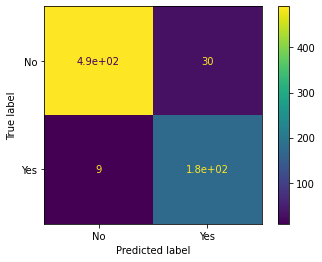

In [ ]:
plot_confusion_matrix(model_search,X_test,y_test)

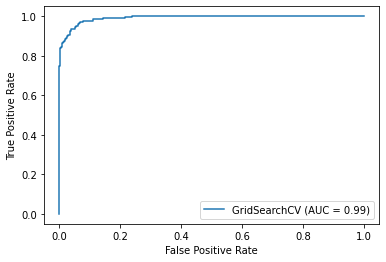

In [ ]:
plot_roc_curve(model_search,X_test,y_test)

# export and deploy

In [ ]:
df.to_csv('feature_selected_telco.csv',index=False,index_label=False)

In [ ]:
from joblib import dump

dump(model_search,'telco_svm_95.joblib')

['telco_svm_95.joblib']